# Missing Values

In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 data.isnull().sum()

In [53]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# Missing data not at random : Systematic Missing Values

In [54]:
data["cabin_null"] = np.where(data['Cabin'].isnull(),1,0)

In [55]:
#find the percentage of null values
data["cabin_null"].mean()

0.7710437710437711

In [56]:
data["cabin_null"]

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: cabin_null, Length: 891, dtype: int64

In [57]:
#percantage of survived (survived means 1)[survived is 0.6,and not survieved is 0.87]
data.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [58]:
#Missing at randomP{MAR}

In [59]:
Man--hide their salary
Woman -- hide their age

SyntaxError: invalid syntax (<ipython-input-59-12470f1573d7>, line 1)

# Mean/Median/Mode

In [60]:
#when the data are missing completely at random(MCAR)

In [61]:
data = pd.read_csv('titanic.csv', usecols=["Age","Fare","Survived"])

In [62]:
data

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [63]:
## Let's go and see the percentage of missing values
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [64]:
def imput_nan(data,variable,median):
        data[variable+"_median"] = data[variable].fillna(median)

In [65]:
median=data['Age'].median()

In [66]:
imput_nan(data,"Age",median)

In [67]:
data["Age"].isnull().sum()

177

In [68]:
data.describe()

,Survived,Age,Fare,Age_median
count,891.000000,714.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208,29.361582
std,0.486592,14.526497,49.693429,13.019697
min,0.000000,0.420000,0.000000,0.420000
25%,0.000000,20.125000,7.910400,22.000000
50%,0.000000,28.000000,14.454200,28.000000
75%,1.000000,38.000000,31.000000,35.000000
max,1.000000,80.000000,512.329200,80.000000


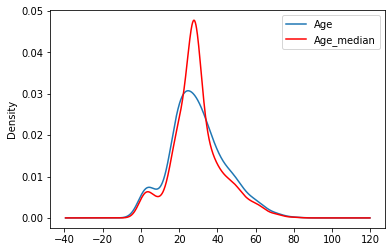

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind = 'kde', ax = ax)
data.Age_median.plot(kind = 'kde', ax=ax, color = 'red')
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines, labels,loc ='best')

# Random Sample Imputation

In [103]:
# consisting of takin random obesrvation from the dataset and we use this observation to replace the nan values

In [126]:
def imput_nan(df, variable,median):
    df[variable + "_median"]=df[variable].fillna(median)
    df[variable + "_random"]=df[variable]
    #it will have the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample
imput_nan(data, "Age",median)

In [128]:
data.head(6)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0


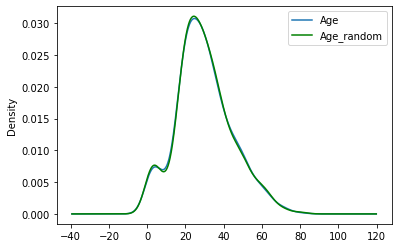

In [130]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind = 'kde', ax = ax)
data.Age_random.plot(kind = 'kde', ax=ax, color = 'green')
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines, labels,loc ='best')

# Capturing NAN values with a new feature

In [134]:
#it works well if data are not missing completely at random 
data = pd.read_csv("titanic.csv", usecols = ["Age","Fare","Survived"])
data

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [135]:
data["Age_NAN"] = np.where(data['Age'].isnull(),1,0)

In [136]:
data

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [139]:
data["Age"].fillna(data.Age.median(), inplace = True)
data.head(6)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1


In [140]:
##End of distribution Imputation

In [141]:
data = pd.read_csv("titanic.csv", usecols = ["Age","Fare","Survived"])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

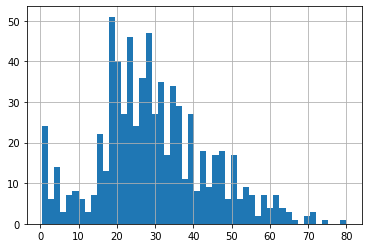

In [145]:
data.Age.hist(bins=50)

In [147]:
data.Age.mean() + 3*data.Age.std()

73.27860964406094

In [148]:
data.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200
